# Rank of a Potential Evaluation Matrix

In [51]:
import numpy as np
import matplotlib.pyplot as pt

Let's make two particle collections: `sources` and `targets`

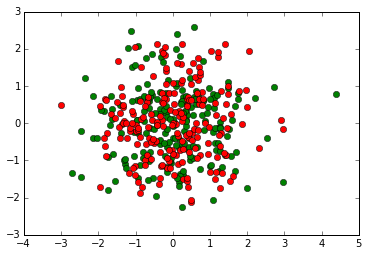

In [52]:
sources = np.random.randn(2, 200)
targets = np.random.randn(2, 200)

pt.plot(sources[0], sources[1], "go")
pt.plot(targets[0], targets[1], "ro")

Now let's assume each of these points has a charge, and evaluate the potential at each of the other points.

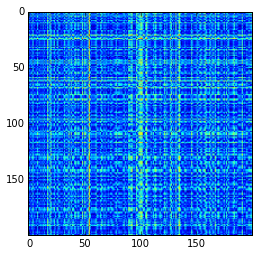

In [53]:
all_distvecs = sources.reshape(2, 1, -1) - targets.reshape(2, -1, 1)
dists = np.sqrt(np.sum(all_distvecs**2, axis=0))
interaction_mat = 1/dists

pt.imshow(dists)

## Finding the Rank: Attempt 1

How do we find the rank? Get the matrix to echelon form, look for zero rows.

**Bonus Q:** Is this the same as LU?

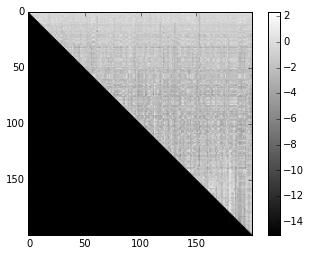

In [54]:
from m_echelon import m_echelon
M, U = m_echelon(interaction_mat)
pt.imshow(np.log10(1e-15+np.abs(U)), cmap="gray")
pt.colorbar()

## Finding the Rank: Attempt 2

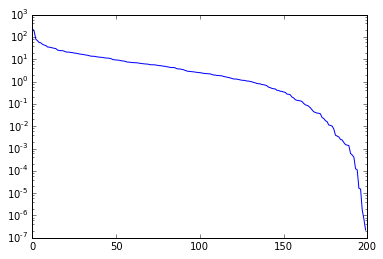

In [55]:
U, sigma, V = np.linalg.svd(interaction_mat)

pt.semilogy(sigma)

In [56]:
k = 60
Uk = U[:, :k]
Vk = V.T[:, :k].T

Ak = (Uk * sigma[:k]).dot(Vk)

np.linalg.norm(interaction_mat - Ak, 2)

7.0952237471847974